https://github.com/aleju/imgaug

In [3]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

import imgaug.augmenters as iaa
import imgaug as ia

In [ ]:
# Read image
img = io.imread('https://www.google.com/images/branding/googlelogo/2x/googlelogo_color_92x30dp.png')[:,:,:3]
plt.imshow(img)
img.shape

In [4]:
# augmentation
seq = iaa.Sequential([
    iaa.Fliplr(0.5), # 50% horizontal flip
    iaa.Flipud(0.5), # 50% vertical flip
    iaa.Affine(
        rotate=(-10, 10), # random rotate -10 ~ +10 degree
        shear=(-16,16), # random shear -16 ~ +16 degree
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)} # scale x, y: 80%~120%
    ),
])

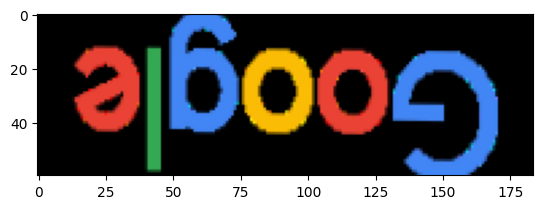

In [11]:
# Augment 1 image
img_aug = seq.augment_image(img)
plt.imshow(img_aug)

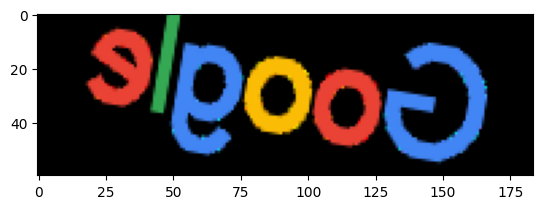

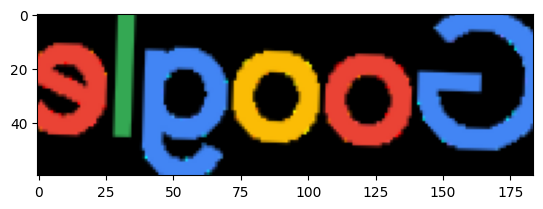

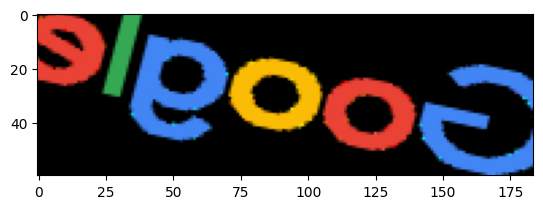

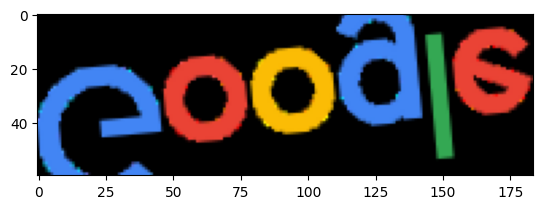

In [12]:
# Augment images (batch size = 4)
img_batch = np.stack([img]*4) # (4, 60, 184, 3)
img_aug_batch = seq.augment_images(img_batch)

for aug in img_aug_batch:
    plt.imshow(aug)
    plt.show()

#### Use Image Augmentation in Dataset

In [ ]:
import torch

class Dataset(torch.utils.data.Dataset):
    def __init__(self, imgs, aug):
        self.imgs = imgs
        self.aug = aug
        self.seq = seq = iaa.Sequential([
            iaa.Fliplr(0.5), # 50% horizontal flip
            iaa.Flipud(0.5), # 50% vertical flip
            iaa.Affine(
                rotate=(-10, 10), # random rotate -10 ~ +10 degree
                shear=(-16,16), # random shear -16 ~ +16 degree
                scale={"x": (0.8, 1.2), "y": (0.8, 1.2)} # scale x, y: 80%~120%
            ),
        ])
    def __len__(self):
        return len(self.imgs)

    def __getitem__(self, idx):
        img = self.imgs[idx]
        if self.aug:
            img = self.seq.augment_image(img)
        return img

In [ ]:
img_batch = np.stack([img]*4) # (4, 60, 184, 3)
dataset = Dataset(img_batch, aug=True)

In [ ]:
for i in range(len(dataset)):
    img = dataset[i]
    plt.imshow(img)
    plt.show()